In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('customer_dataset.csv')

### EDA

In [ ]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    517 non-null    float64
 1   age                   451 non-null    float64
 2   gender                491 non-null    object 
 3   income                512 non-null    float64
 4   spending_score        465 non-null    float64
 5   membership_years      484 non-null    float64
 6   purchase_frequency    515 non-null    float64
 7   preferred_category    505 non-null    object 
 8   last_purchase_amount  497 non-null    float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB
(1000, 9)


In [ ]:
df.tail()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
995,996.0,57.0,NaN,112170.0,NaN,6.0,1.0,Clothing,313.64
996,NaN,NaN,Other,65337.0,NaN,10.0,NaN,NaN,NaN
997,998.0,23.0,NaN,NaN,NaN,NaN,42.0,Sports,NaN
998,NaN,22.0,Female,NaN,63.0,NaN,NaN,Elec,505.16
999,NaN,36.0,NaN,90420.0,NaN,NaN,31.0,Groceries,NaN


In [ ]:
df['preferred_category'].value_counts()

preferred_category
Elec             112
Home & Garden    109
Groceries        104
Sports            99
Clothing          81
Name: count, dtype: int64

In [ ]:
df['id'] = df['id'].astype(str)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   age                   451 non-null    float64
 2   gender                491 non-null    object 
 3   income                512 non-null    float64
 4   spending_score        465 non-null    float64
 5   membership_years      484 non-null    float64
 6   purchase_frequency    515 non-null    float64
 7   preferred_category    505 non-null    object 
 8   last_purchase_amount  497 non-null    float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [ ]:
df['age'].isnull().sum()

549

In [ ]:
df.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,451.000000,5.120000e+02,465.000000,484.000000,515.000000,497.000000
mean,43.168514,9.820104e+04,52.494624,5.528926,26.019417,502.134547
std,15.258746,1.041681e+05,30.179857,2.851971,14.386400,301.032609
min,18.000000,3.005800e+04,1.000000,1.000000,1.000000,10.400000
25%,30.000000,5.869500e+04,28.000000,3.000000,14.000000,215.920000
50%,43.000000,8.789650e+04,50.000000,5.500000,26.000000,495.490000
75%,56.000000,1.156020e+05,78.000000,8.000000,38.000000,772.890000
max,69.000000,1.479620e+06,210.000000,10.000000,50.000000,998.510000


##Tratamento valores nulos

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())
df['income'] = df['income'].fillna(df['income'].mean())
df['spending_score'] = df['spending_score'].fillna(df['spending_score'].mean())
df['membership_years'] = df['membership_years'].fillna(df['membership_years'].mean())
df['purchase_frequency'] = df['purchase_frequency'].fillna(df['purchase_frequency'].mean())
df['last_purchase_amount'] = df['last_purchase_amount'].fillna(df['last_purchase_amount'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   age                   1000 non-null   float64
 2   gender                491 non-null    object 
 3   income                1000 non-null   float64
 4   spending_score        1000 non-null   float64
 5   membership_years      1000 non-null   float64
 6   purchase_frequency    1000 non-null   float64
 7   preferred_category    505 non-null    object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [ ]:
df['gender'].value_counts()

gender
Other     166
Male       95
Female     67
M          51
male       44
female     41
F          27
Name: count, dtype: int64

## Transformando valores nulos categoricos

In [ ]:
female = ['female', 'F']
male = ['male', 'M']
df['gender'] = df['gender'].replace(female, 'Female')
df['gender'] = df['gender'].replace(male, 'Male')

In [ ]:
df['gender'].value_counts()

gender
Male      190
Other     166
Female    135
Name: count, dtype: int64

In [ ]:
df['preferred_category'].value_counts()

preferred_category
Elec             112
Home & Garden    109
Groceries        104
Sports            99
Clothing          81
Name: count, dtype: int64

In [ ]:
df['gender'] = df['gender'].fillna('Unknown')

In [ ]:
df['preferred_category'] = df['preferred_category'].fillna('Unknown')

In [ ]:
df['preferred_category'].value_counts(normalize=True)

preferred_category
Unknown          0.495
Elec             0.112
Home & Garden    0.109
Groceries        0.104
Sports           0.099
Clothing         0.081
Name: proportion, dtype: float64

In [ ]:
df['gender'].value_counts(normalize=True)

gender
Unknown    0.509
Male       0.190
Other      0.166
Female     0.135
Name: proportion, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   age                   1000 non-null   float64
 2   gender                1000 non-null   object 
 3   income                1000 non-null   float64
 4   spending_score        1000 non-null   float64
 5   membership_years      1000 non-null   float64
 6   purchase_frequency    1000 non-null   float64
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


## Transformando tipo das variáveis

In [ ]:
df['age'] = df['age'].astype(int)
df['income'] = df['income'].astype(int)

In [ ]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1.0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547
1,nan,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000
2,3.0,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547
3,nan,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547
4,5.0,43,Unknown,140621,210.000000,5.528926,25.000000,Unknown,502.134547


In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547
1,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000
2,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547
3,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547
4,43,Unknown,140621,210.000000,5.528926,25.000000,Unknown,502.134547


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   float64
 4   membership_years      1000 non-null   float64
 5   purchase_frequency    1000 non-null   float64
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 62.6+ KB


## visualização de distribuição

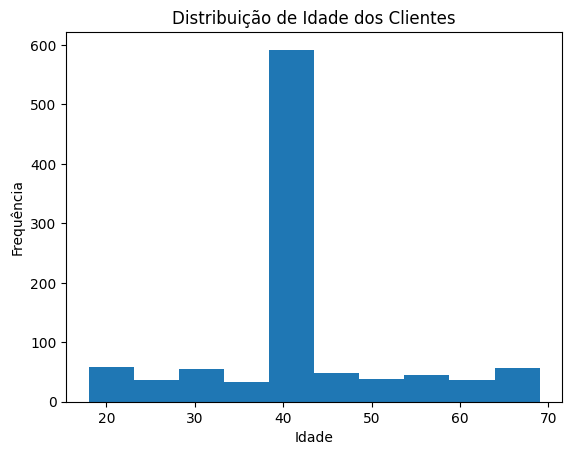

In [ ]:
plt.hist(df['age'], bins=10)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idade dos Clientes')
plt.show()

In [ ]:
df = df[df['spending_score'] <= 100]

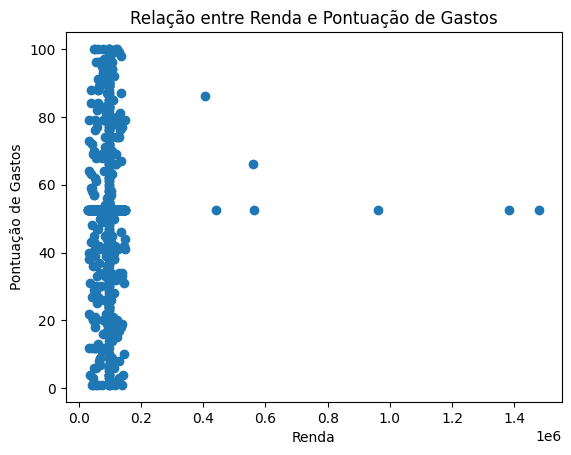

In [ ]:
plt.scatter(df['income'], df['spending_score'])
plt.xlabel('Renda')
plt.ylabel('Pontuação de Gastos')
plt.title('Relação entre Renda e Pontuação de Gastos')
plt.show()

# Criando Segmentação

In [ ]:

df['income_qcut'] = pd.qcut(df['income'], q=4, duplicates='drop')

In [ ]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut
0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(0.999, 52.495]"
1,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(0.999, 52.495]"
2,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(0.999, 52.495]"
3,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(52.495, 100.0]"
5,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(0.999, 52.495]"


In [ ]:
income_counts = df['income_qcut'].value_counts()

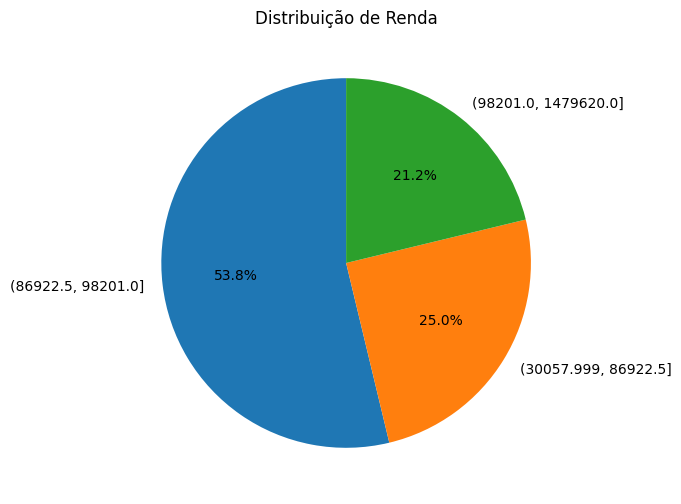

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Renda')
plt.show()

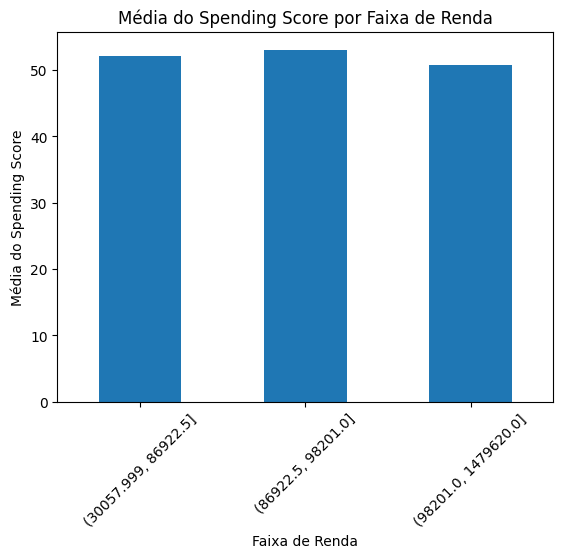

In [ ]:
df.groupby('income_qcut')['spending_score'].mean().plot(kind='bar')
plt.title('Média do Spending Score por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média do Spending Score')
plt.xticks(rotation=45)
plt.show()

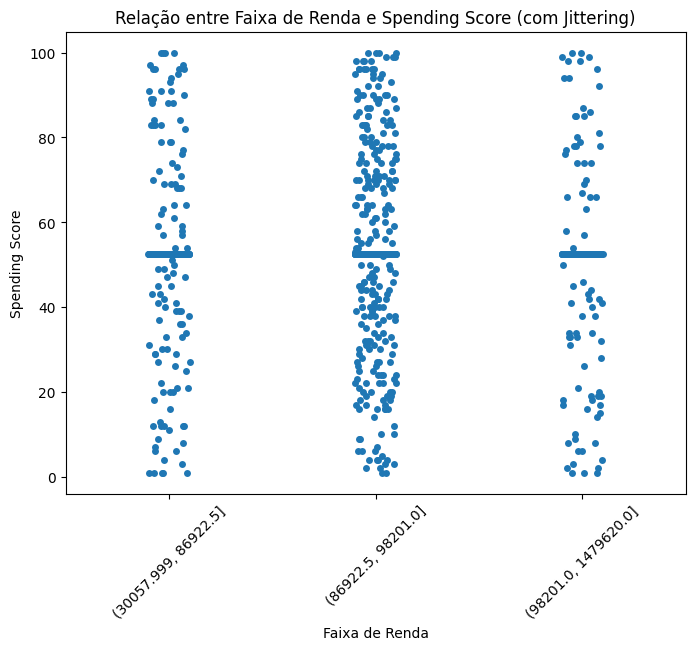

In [ ]:

plt.figure(figsize=(8, 6))
sns.stripplot(x='income_qcut', y=df['spending_score'].loc[df['spending_score'] < 150], data=df, jitter=True, dodge=True)
plt.title('Relação entre Faixa de Renda e Spending Score (com Jittering)')
plt.xlabel('Faixa de Renda')
plt.ylabel('Spending Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['income_qcut'].info()

<class 'pandas.core.series.Series'>
Index: 999 entries, 0 to 999
Series name: income_qcut
Non-Null Count  Dtype   
--------------  -----   
999 non-null    category
dtypes: category(1)
memory usage: 8.9 KB


In [ ]:
df['income_qcut'].value_counts()

income_qcut
(86922.5, 98201.0]      537
(30057.999, 86922.5]    250
(98201.0, 1479620.0]    212
Name: count, dtype: int64

In [ ]:
mapeamento_renda = {
    '(30057.999, 86922.5]': 1,
    '(86922.5, 98201.0]': 2,
    '(98201.0, 1479620.0]': 3
}


df['income_level'] = df['income_qcut'].astype(str).map(mapeamento_renda)


In [ ]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level
0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(0.999, 52.495]",1.0
1,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1.0
2,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(0.999, 52.495]",1.0
3,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(52.495, 100.0]",NaN
5,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1.0


In [ ]:
df['income_level'].value_counts()

income_level
2    537
1    250
3    212
Name: count, dtype: int64

In [ ]:
df['spending_qcut'] = pd.qcut(df['spending_score'], q=4, duplicates='drop')

In [ ]:
df['spending_qcut'].value_counts()

spending_qcut
(0.999, 52.495]    770
(52.495, 100.0]    229
Name: count, dtype: int64

In [ ]:
mapeamento_spending = {
    '(0.999, 52.495]': 1,
    '(52.495, 100.0]': 2
}


df['spending_level'] = df['spending_qcut'].astype(str).map(mapeamento_spending)

In [ ]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level
0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(0.999, 52.495]",1
1,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1
2,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(0.999, 52.495]",1
3,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(52.495, 100.0]",2
5,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1


In [ ]:
df['purchase_frequency_qcut'] = pd.qcut(df['purchase_frequency'], q=3, duplicates='drop')

In [ ]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut
0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(0.999, 52.495]",1,"(0.999, 26.019]"
1,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1,"(26.019, 50.0]"
2,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(0.999, 52.495]",1,"(26.019, 50.0]"
3,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(52.495, 100.0]",2,"(0.999, 26.019]"
5,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1,"(0.999, 26.019]"


In [ ]:
df['purchase_frequency_qcut'].value_counts()

purchase_frequency_qcut
(0.999, 26.019]    742
(26.019, 50.0]     257
Name: count, dtype: int64

In [ ]:
mapeamento_purchase = {
    '(0.999, 26.019]': 1,
    '(26.019, 50.0]': 2
}


df['purchase_frequency_level'] = df['purchase_frequency_qcut'].astype(str).map(mapeamento_purchase)

In [ ]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut,purchase_frequency_level
0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(0.999, 52.495]",1,"(0.999, 26.019]",1
1,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1,"(26.019, 50.0]",2
2,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(0.999, 52.495]",1,"(26.019, 50.0]",2
3,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(52.495, 100.0]",2,"(0.999, 26.019]",1
5,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1,"(0.999, 26.019]",1


In [ ]:
df['membership_years_qcut'] = pd.qcut(df['membership_years'], q=3, duplicates='drop')

df['membership_years_qcut'].value_counts()

membership_years_qcut
(0.999, 5.529]    757
(5.529, 10.0]     242
Name: count, dtype: int64

In [ ]:
mapeamento_years = {
    '(0.999, 5.529]': 1,
    '(5.529, 10.0]': 2
}


df['membership_years_score'] = df['membership_years_qcut'].astype(str).map(mapeamento_years)

In [ ]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score
0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(0.999, 52.495]",1,"(0.999, 26.019]",1,"(0.999, 5.529]",1
1,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1,"(26.019, 50.0]",2,"(0.999, 5.529]",1
2,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(0.999, 52.495]",1,"(26.019, 50.0]",2,"(0.999, 5.529]",1
3,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(52.495, 100.0]",2,"(0.999, 26.019]",1,"(0.999, 5.529]",1
5,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1,"(0.999, 26.019]",1,"(0.999, 5.529]",1


In [ ]:
df['last_purchase_amount_qcut'] = pd.qcut(df['last_purchase_amount'], q=2, duplicates='drop')

df['last_purchase_amount_qcut'].value_counts()

last_purchase_amount_qcut
(10.399000000000001, 502.135]    752
(502.135, 998.51]                247
Name: count, dtype: int64

In [ ]:
mapeamento_amount = {
    '(10.399000000000001, 502.135]': 1,
    '(502.135, 998.51]': 2
}


df['last_purchase_amount_score'] = df['last_purchase_amount_qcut'].astype(str).map(mapeamento_amount)

In [ ]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score,last_purchase_amount_qcut,last_purchase_amount_score
0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(0.999, 52.495]",1,"(0.999, 26.019]",1,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1
1,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1,"(26.019, 50.0]",2,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1
2,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(0.999, 52.495]",1,"(26.019, 50.0]",2,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1
3,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(52.495, 100.0]",2,"(0.999, 26.019]",1,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1
5,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1,"(0.999, 26.019]",1,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1


In [ ]:
df['score_final'] = df['income_level'] + df['spending_level'] + df['purchase_frequency_level'] + df['membership_years_score'] + df['last_purchase_amount_score']

In [ ]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score,last_purchase_amount_qcut,last_purchase_amount_score,score_final
0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,"(0.999, 52.495]",1,"(0.999, 26.019]",1,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,7
1,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1,"(26.019, 50.0]",2,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,6
2,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(0.999, 52.495]",1,"(26.019, 50.0]",2,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,7
3,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,"(52.495, 100.0]",2,"(0.999, 26.019]",1,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,7
5,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,"(0.999, 52.495]",1,"(0.999, 26.019]",1,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,5


In [ ]:
 df['score_final_qcut'] = pd.qcut(df['score_final'], q=3, duplicates='drop')

In [ ]:
 df['score_final_qcut'].value_counts()

score_final_qcut
(6.0, 7.0]      367
(4.999, 6.0]    352
(7.0, 11.0]     280
Name: count, dtype: int64

In [ ]:
print( df['income_level'].max())
print(df['spending_level'].max())
print( df['purchase_frequency_level'].max())
print(df['membership_years_score'].max())
print(df['last_purchase_amount_score'].max())

3
2
2
2
2


In [ ]:
mapeamento_score = {
    '(4.999, 6.0]': 'bronze',
    '(6.0, 7.0]': 'prata',
    '(7.0, 11.0]':'ouro'
}


df['categoria_cliente'] = df['score_final_qcut'].astype(str).map(mapeamento_score)

# Segmentação Pronta

In [ ]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,...,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score,last_purchase_amount_qcut,last_purchase_amount_score,score_final,score_final_qcut,categoria_cliente
0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,...,1,"(0.999, 26.019]",1,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,7,"(6.0, 7.0]",prata
1,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,...,1,"(26.019, 50.0]",2,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,6,"(4.999, 6.0]",bronze
2,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,...,1,"(26.019, 50.0]",2,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,7,"(6.0, 7.0]",prata
3,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,...,2,"(0.999, 26.019]",1,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,7,"(6.0, 7.0]",prata
5,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,...,1,"(0.999, 26.019]",1,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,5,"(4.999, 6.0]",bronze


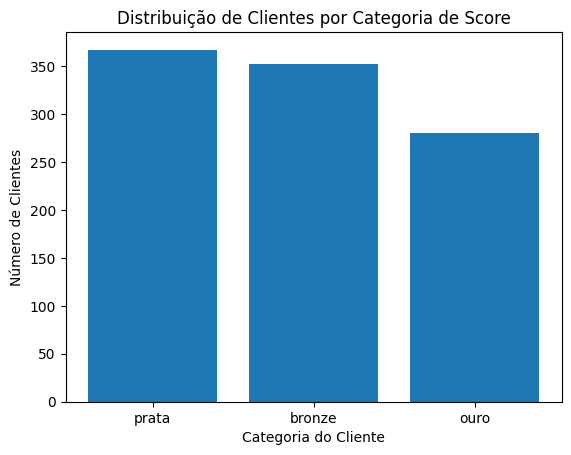

In [ ]:
contagem_categorias = df['categoria_cliente'].value_counts()

# Criando o gráfico de barras
plt.bar(contagem_categorias.index, contagem_categorias.values)

# Configurando o título e os rótulos dos eixos
plt.title('Distribuição de Clientes por Categoria de Score')
plt.xlabel('Categoria do Cliente')
plt.ylabel('Número de Clientes')

# Exibindo o gráfico
plt.show()

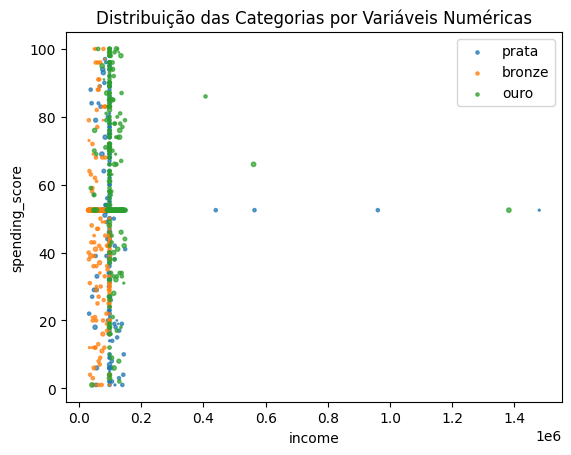

In [ ]:
colunas_numericas = ['income','spending_score', 'membership_years','purchase_frequency','last_purchase_amount']  # Substitua pelos nomes das suas colunas

fig, ax = plt.subplots()

for categoria in df['categoria_cliente'].unique():
    subset = df[df['categoria_cliente'] == categoria]
    ax.scatter(subset[colunas_numericas[0]],
               subset[colunas_numericas[1]],
               subset[colunas_numericas[2]],
               label=categoria, alpha=0.7)


ax.set_xlabel(colunas_numericas[0])
ax.set_ylabel(colunas_numericas[1])
ax.set_title('Distribuição das Categorias por Variáveis Numéricas')
plt.legend()
plt.show()